<a href="https://colab.research.google.com/github/michaelsyao/AI_in_Finance/blob/main/02_superintelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import numpy as np
import pandas as pd
np.random.seed(100)

In [ ]:
env = gym.make('CartPole-v0')

In [ ]:
env.seed(100)

[100]

In [ ]:
action_size = env.action_space.n
action_size

2

In [ ]:
[env.action_space.sample() for _ in range(10)]

[0, 0, 0, 1, 0, 0, 1, 0, 0, 1]

In [ ]:
state_size = env.observation_space.shape[0]
state_size

4

In [ ]:
state = env.reset()
state  # [cart position, cart velocity, pole angle, pole angular velocity]

array([ 0.00767905,  0.00816652, -0.00339356, -0.00722042])

In [ ]:
state, reward, done, _ = env.step(env.action_space.sample())
state, reward, done, _

(array([ 0.00784239,  0.20333697, -0.00353797, -0.30097212]), 1.0, False, {})

In [ ]:
env.step?

In [ ]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state = env.reset()
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110:
        data = data.append(pd.DataFrame(results))
        length.append(treward)

CPU times: user 9.43 s, sys: 337 ms, total: 9.77 s
Wall time: 9.39 s


In [ ]:
length

[111.0, 144.0, 124.0, 124.0, 110.0, 115.0]

In [ ]:
np.array(length).mean()

121.33333333333333

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 114
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      728 non-null    float64
 1   s2      728 non-null    float64
 2   s3      728 non-null    float64
 3   s4      728 non-null    float64
 4   a       728 non-null    int64  
 5   r       728 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 39.8 KB


In [ ]:
np.array(length).sum()

728.0

In [ ]:
data.tail()

,s1,s2,s3,s4,a,r
110,-0.705951,-0.017090,-0.174099,-0.495957,0,1.0
111,-0.706293,-0.209384,-0.184018,-0.262802,1,1.0
112,-0.710480,-0.012178,-0.189274,-0.607414,0,1.0
113,-0.710724,-0.204220,-0.201422,-0.379810,1,1.0
114,-0.714808,-0.006893,-0.209018,-0.728635,1,1.0


In [ ]:
np.array(length).cumsum()

array([111., 255., 379., 503., 613., 728.])

In [ ]:
length_cumsum = np.array(length).cumsum()

In [ ]:
for i in range(len(length_cumsum)):
  print(data.iloc[[int(length_cumsum[i])-1]])
  print()

           s1        s2        s3        s4  a    r
110  0.061613 -1.149625  0.194306  1.743786  0  1.0

           s1        s2        s3        s4  a    r
143  0.291524  0.982865 -0.209023 -1.531715  1  1.0

           s1        s2        s3        s4  a    r
123 -1.516885 -1.028251  0.201864  1.696197  1  1.0

           s1       s2       s3       s4  a    r
123  2.152674  2.38401 -0.18995 -1.35057  1  1.0

          s1        s2        s3       s4  a    r
109 -0.63553 -1.000287  0.191542  1.19692  1  1.0

           s1        s2        s3        s4  a    r
114 -0.714808 -0.006893 -0.209018 -0.728635  1  1.0



In [ ]:
12*2*np.pi / 360

0.20943951023931953

In [ ]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu',
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

CPU times: user 1.54 s, sys: 62.5 ms, total: 1.6 s
Wall time: 1.88 s


In [ ]:
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.653544,0.608247,0.656452,0.602740
23,0.653062,0.606529,0.656126,0.589041
24,0.653088,0.603093,0.656027,0.602740


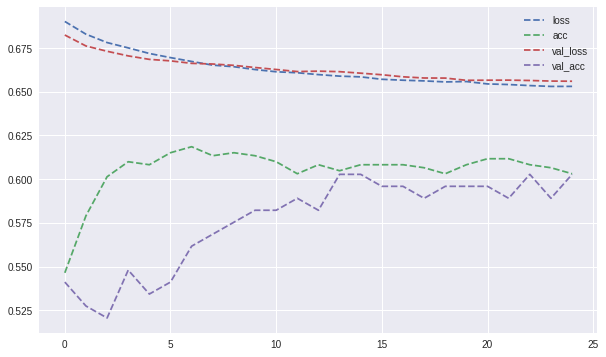

In [ ]:
res.plot(figsize=(10, 6), style='--');

In [ ]:
def epoch():
    done = False
    state = env.reset()
    treward = 1
    while not done:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        state, reward, done, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [ ]:
length

[111.0, 144.0, 124.0, 124.0, 110.0, 115.0]

In [ ]:
epoch()

200.0

In [ ]:
res = np.array([epoch() for _ in range(100)])
res

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200.])

In [ ]:
res.mean()

200.0

In [ ]:
np.array(length).mean()

121.33333333333333

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 114
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      728 non-null    float64
 1   s2      728 non-null    float64
 2   s3      728 non-null    float64
 3   s4      728 non-null    float64
 4   a       728 non-null    int64  
 5   r       728 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 39.8 KB


In [ ]:
np.array(length).sum()

728.0

In [ ]:
data.tail()

,s1,s2,s3,s4,a,r
110,-0.705951,-0.017090,-0.174099,-0.495957,0,1.0
111,-0.706293,-0.209384,-0.184018,-0.262802,1,1.0
112,-0.710480,-0.012178,-0.189274,-0.607414,0,1.0
113,-0.710724,-0.204220,-0.201422,-0.379810,1,1.0
114,-0.714808,-0.006893,-0.209018,-0.728635,1,1.0


In [ ]:
np.array(length).cumsum()

array([111., 255., 379., 503., 613., 728.])

In [ ]:
length_cumsum = np.array(length).cumsum()

In [ ]:
for i in range(len(length_cumsum)):
  print(data.iloc[[int(length_cumsum[i])-1]])
  print()

           s1        s2        s3        s4  a    r
110  0.061613 -1.149625  0.194306  1.743786  0  1.0

           s1        s2        s3        s4  a    r
143  0.291524  0.982865 -0.209023 -1.531715  1  1.0

           s1        s2        s3        s4  a    r
123 -1.516885 -1.028251  0.201864  1.696197  1  1.0

           s1       s2       s3       s4  a    r
123  2.152674  2.38401 -0.18995 -1.35057  1  1.0

          s1        s2        s3       s4  a    r
109 -0.63553 -1.000287  0.191542  1.19692  1  1.0

           s1        s2        s3        s4  a    r
114 -0.714808 -0.006893 -0.209018 -0.728635  1  1.0

